# A Python Lecture Series

## Lecture 3

#### by Luca Mingarelli

# Lecture 3
## Content:

   - Matplotlib
   - Importing data from the web
   

## Matplotlib - A brief tour

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

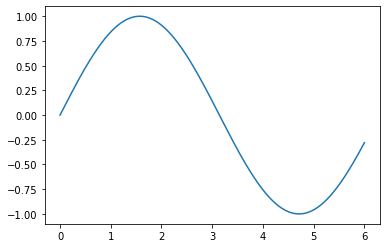

In [2]:
x = np.linspace(0,6,1000)
y = np.sin(x)
plt.plot(x,y)
plt.show() 
# Actually plt.show() isnot necessary here, 
# but needed in IPython 
# or from command line

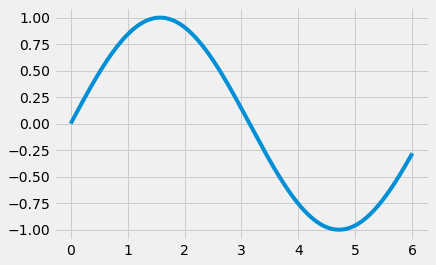

In [3]:
#It is possible to change the style as
with plt.style.context(
    'fivethirtyeight'):
    plt.plot(x,y);plt.ylim([-1.1,1.1])

<font size=4>`plt.style.use('style-name')` to change across all the notebook;`plt.style.available` to obtain all available styles. [More info here](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html).</font>

In [ ]:
import piplite
await piplite.install('seaborn')
await piplite.install('pycountry')
await piplite.install('pandas_datareader')

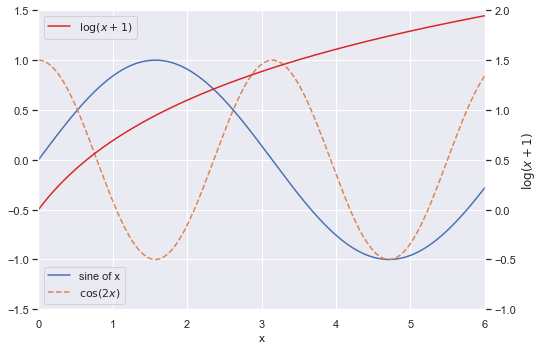

In [5]:
## Plotting
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5.5)})
plt.plot(x,y);
plt.plot(x,np.cos(2*x),'--');
plt.xlabel('x');plt.legend(['sine of x','$\cos(2x)$'],loc='lower left');
plt.ylim((-1.5,1.5));
plt.twinx(); ## creates new y-axis
plt.plot(x,np.log(x+1),color = 'tab:red');
plt.grid(None)
plt.ylabel('$\log(x+1)$');plt.legend(['$\log(x+1)$']);
plt.ylim((-1,2));
plt.xlim((0,6));
# ## Export (Right click and download!)
plt.savefig('img/my_plot.png',dpi=500,transparent=True); 
# ## dpi = dots-per-inch; transparent sets alpha-channel to 0

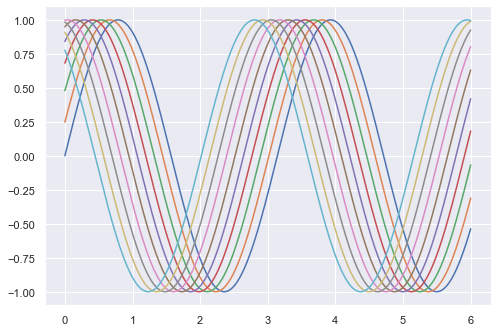

In [6]:
for k in range(10):
    plt.plot(x,np.sin(2*x+k/4));

#### Line Styles

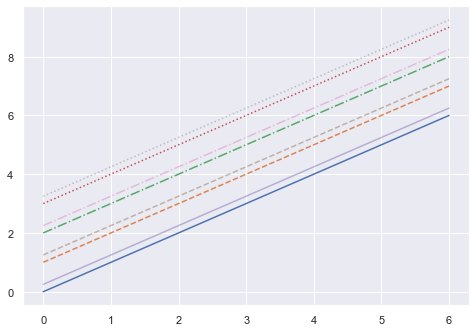

In [7]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');
# For short, you can use the following codes:
plt.plot(x, x + 0.25, linestyle='-',alpha= 0.5)  # solid
plt.plot(x, x + 1.25, linestyle='--',alpha= 0.5) # dashed
plt.plot(x, x + 2.25, linestyle='-.',alpha= 0.5) # dashdot
plt.plot(x, x + 3.25, linestyle=':',alpha= 0.5);  # dotted

#### Scatter Plots

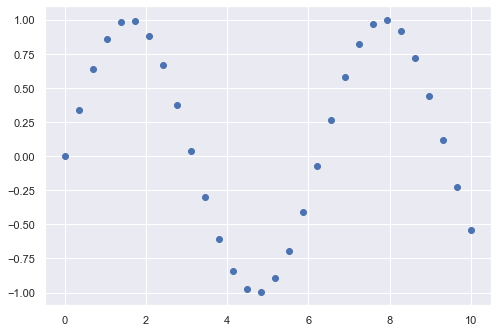

In [8]:
x = np.linspace(0, 10, 30) 
y = np.sin(x)
plt.plot(x, y, 'o');# '-o'

#### Markers

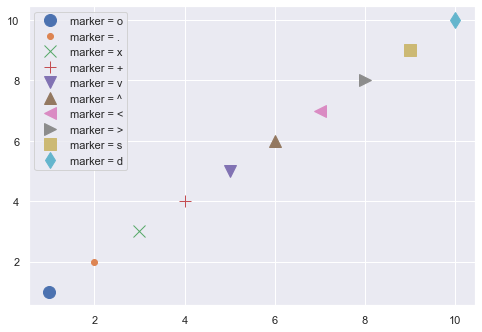

In [9]:
x=0
for marker in ['o', '.', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    x = x + 1
    plt.plot(x, x, marker,markersize=12,label="marker = " + marker)
plt.legend();

#### Alternatively, Scatter Plot with `plt.scatter`

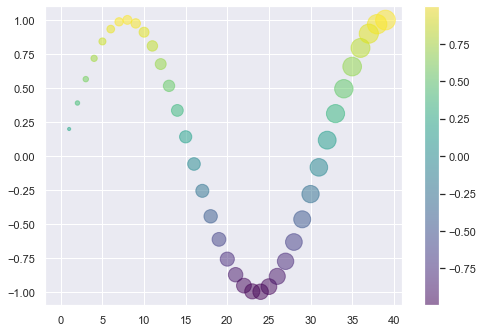

In [10]:
x = np.linspace(0,39,40)
y = np.sin(x/5)
colors = y
sizes = 10*x
plt.scatter(x,y,c=colors,cmap='viridis',s=sizes, alpha = 0.5)
plt.colorbar();  # show color scale

[More colormaps here](https://matplotlib.org/examples/color/colormaps_reference.html).

#### Histograms

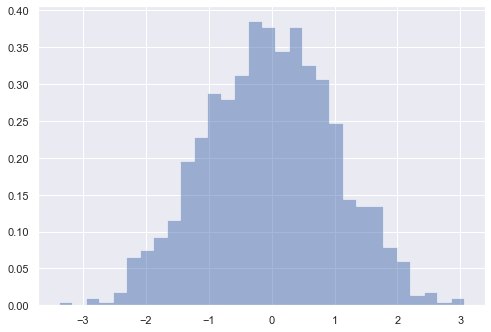

In [11]:
data = np.random.randn(1000)
plt.hist(data, bins=30, density=True, alpha=0.5,histtype='stepfilled');

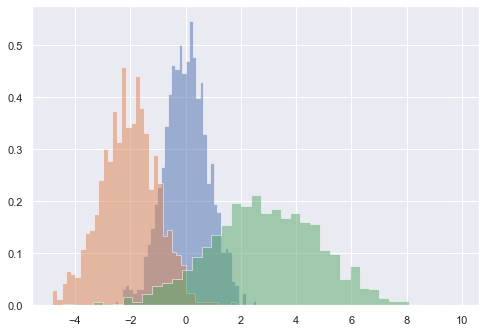

In [12]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

## by the way, we can pass the same options to multiple plots!
kwargs = dict(histtype='stepfilled', alpha=0.5, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

#### Subplots - by hand

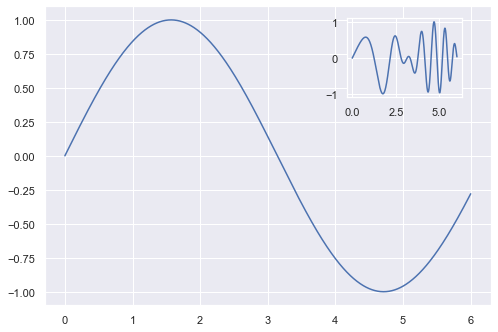

In [13]:
x = np.linspace(0, 6,1000)
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax1.plot(x,np.sin(x));
ax2.plot(x,np.sin(x)*np.cos(x**2));

#### Subplots - with `plt.subplot`

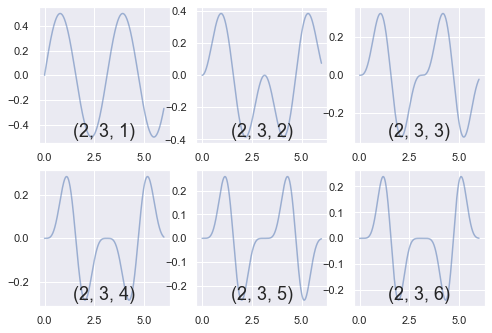

In [14]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    y=np.sin(x)**i*np.cos(x)
    plt.plot(x,y,alpha=0.5)
    plt.text(np.mean(x), min(y), str((2, 3, i)),
             fontsize=18, ha='center')

#### Subplots - or with `plt.subplots`

to share axis

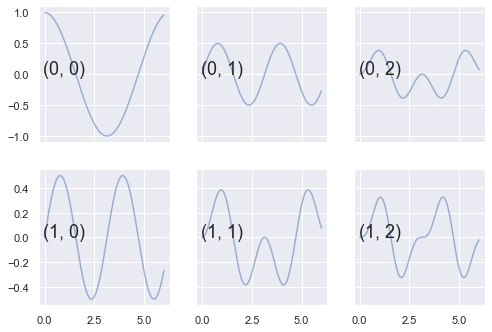

In [15]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        y=np.sin(x)**(i+j)*np.cos(x)
        ax[i, j].plot(x,y,alpha=0.5)
        ax[i, j].text(1, 0, str((i, j)),
                      fontsize=18, ha='center')

#### Subplots - or with `plt.GridSpec`

for more complicated arrangements

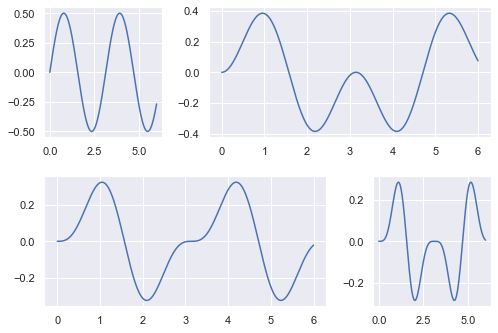

In [16]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.plot(x,np.sin(x)*np.cos(x))
plt.subplot(grid[0, 1:])
plt.plot(x,np.sin(x)**(2)*np.cos(x))
plt.subplot(grid[1, :2])
plt.plot(x,np.sin(x)**(3)*np.cos(x))
plt.subplot(grid[1, 2]);
plt.plot(x,np.sin(x)**(4)*np.cos(x));

#### A few more complicated plots

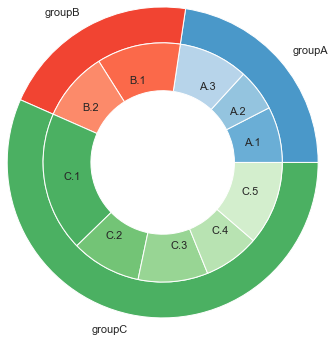

In [17]:
# Double donut
# Make data: consider 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
# First Ring (outside)
fig, ax = plt.subplots()
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, 
                  colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, 
                   labeldistance=0.7, 
                   colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), 
                           c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0) 

In [18]:
import pandas as pd
data = pd.read_csv('res/vulcano.csv')
# Transform data to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes

/var/folders/mr/_y_c100s5j378qr8ddz_jnch0000gn/T/ipykernel_10474/2669646944.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


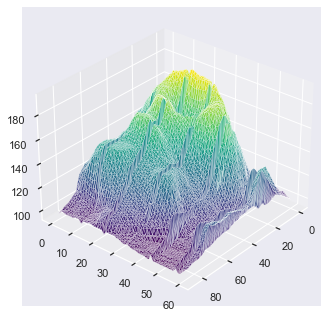

In [19]:
## prevents cell to print output
from mpl_toolkits.mplot3d import Axes3D

 
# for angle in range(0,360,1):
#     # Make the plot
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
 
#     # Set the angle of the camera
#     ax.view_init(30,angle)
#     # Save it
#     filename='./img/PNG/ANIMATION/Vulcano_step'+str(angle)+'.png'
#     plt.savefig(filename, dpi=180) 

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# Set the angle of the camera
ax.view_init(30, 40) 

### A very brief tour of Seaborn

In [20]:
import pandas as pd
data = np.random.multivariate_normal(
    [0, 0], [[5, 2], [2, 2]],
    size=2000)
data = pd.DataFrame(
    data, columns=['x', 'y'])
data.head(5)

,x,y
0,2.674171,0.763949
1,-1.031913,-0.510136
2,-1.512938,0.188414
3,-2.830670,-3.393888
4,-1.306585,-0.043250


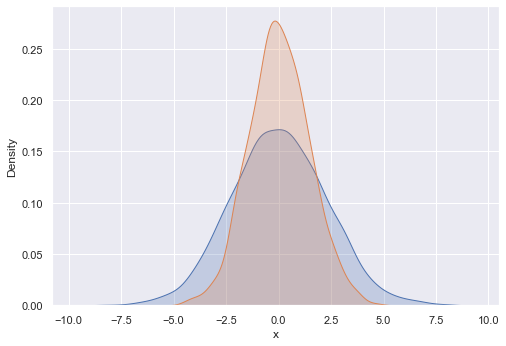

In [21]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

#### Visualise the joint distribution

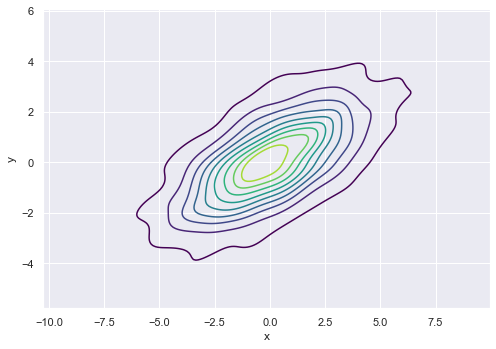

In [22]:
sns.kdeplot(x=data['x'], y=data['y'], 
            cmap='viridis');

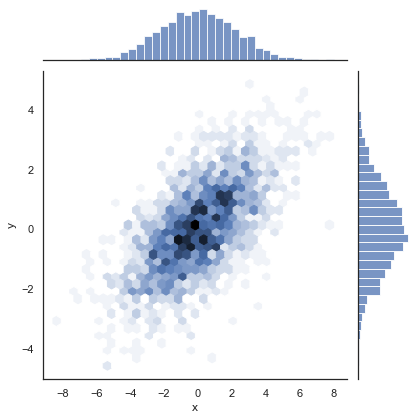

In [23]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, 
                  kind='hex')
# 'hex','kde'

In [24]:
tips = sns.load_dataset("tips")
tips.head()  # tips to restaurant staff

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



|Column| Description|
|--|--|
|total_bill| Total bill including tax [USD]|
|tip| Tip [USD]|
|sex| Sex of person paying|
|smoker| Smoker in party?|
|day |Day of the week|
|time |Time of the day|
|size|Size of the party|

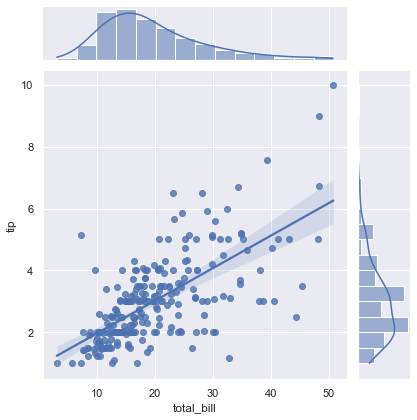

In [25]:
sns.jointplot(x="total_bill", y="tip",
              data=tips, kind="reg");

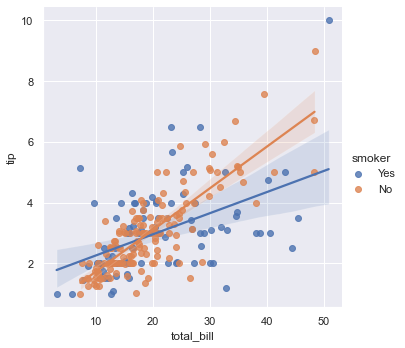

In [26]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

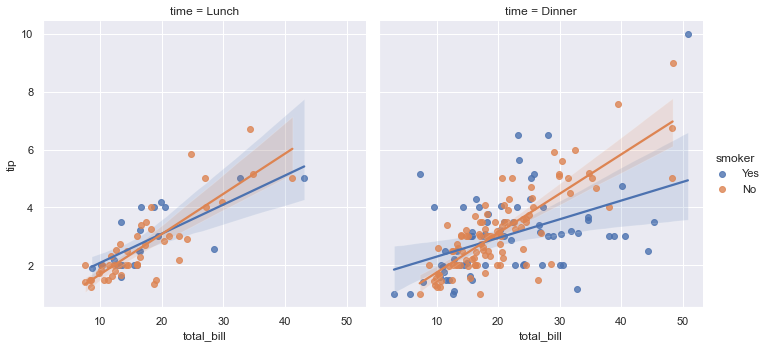

In [27]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

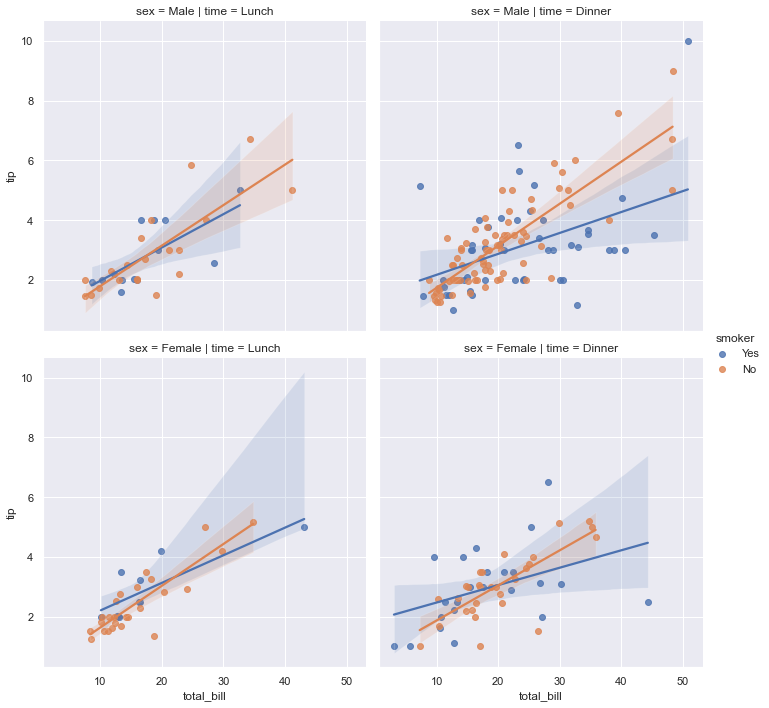

In [28]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips);

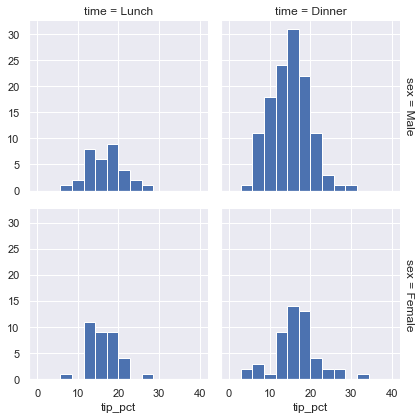

In [29]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

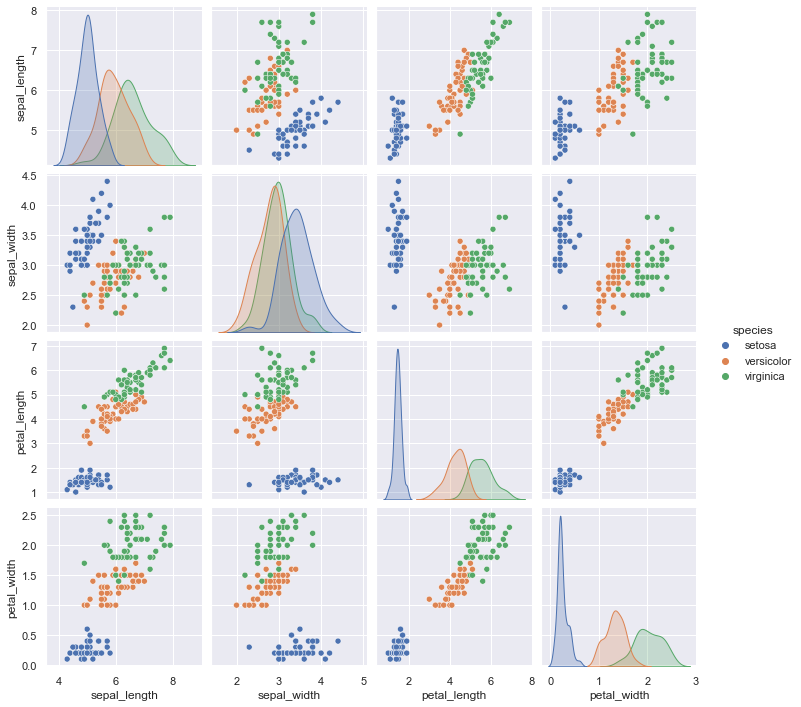

In [30]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', height=2.5);

## Importing data from the web
### i.e. [Pandas' DataReader](https://pandas-datareader.readthedocs.io/en/latest/index.html)

#### Remote Data Access to:
- FRED
- World Bank
- OECD
- Eurostat
- Yahoo Finance
- ...

and [more](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html).

#### Suppose we want recent data on economic growth for the EU founder countries.

To download data from, say, the WorldBank, we must know the exact indicator of the data we want to read.

In [31]:
from pandas_datareader import wb
# wb.search('gdp')
wb.search('gdp.*capita.*const').iloc[:,:2] 
###  `.*` indicates that any text in that position is a match

,id,name
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
10522,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)
10524,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
10526,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."
10527,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation..."


In [32]:
gdp_pc_conts_idx = wb.search('gdp.*capita.*const').iloc[1,0]
gdp_pc_conts_idx 

'NY.GDP.PCAP.KD'

We create a list of country indicators:

In [33]:
countries = ['DE', 'FR', 'IT', 'NL', 'BE','LU']

In [34]:
data = wb.download(indicator='NY.GDP.PCAP.KD',country=countries,start=1991, end=2018)
## rearrange data
GDP = data.reset_index().pivot('year','country')
GDP.head(4)

NY.GDP.PCAP.KD                                            \
country        Belgium        France       Germany         Italy   
year                                                               
1991      29870.147775  28663.284084  30766.928958  27894.242795   
1992      30204.563752  28977.262087  31121.070565  28107.859026   
1993      29797.406320  28670.599168  30615.140212  27851.121358   
1994      30664.307855  29237.706320  31238.879060  28444.410255   

                                     
country    Luxembourg   Netherlands  
year                                 
1991     70779.972915  31614.652893  
1992     71116.940089  31911.835372  
1993     73116.194663  32088.706600  
1994     74883.141854  32840.278104

At this point, we can easily compute each country's growth as

In [35]:
GROWTH = 100 * GDP.pct_change()
GROWTH.head(5)

NY.GDP.PCAP.KD                                                     
country        Belgium    France   Germany     Italy Luxembourg Netherlands
year                                                                       
1991               NaN       NaN       NaN       NaN        NaN         NaN
1992          1.119566  1.095401  1.151046  0.765808   0.476077    0.940015
1993         -1.348000 -1.058288 -1.625684 -0.913402   2.811221    0.554250
1994          2.909319  1.978009  2.037354  2.130215   2.416629    2.342168
1995          2.170550  1.738506  1.246142  2.885202   0.017300    2.607973

(It is also possible to automatically generate a $\LaTeX$ table as 
`GROWTH.tail(6).round(2).to_latex('my_table.tex')`. This creates a file called `my_table.tex` in the current directory.)

Finally, we plot the results:

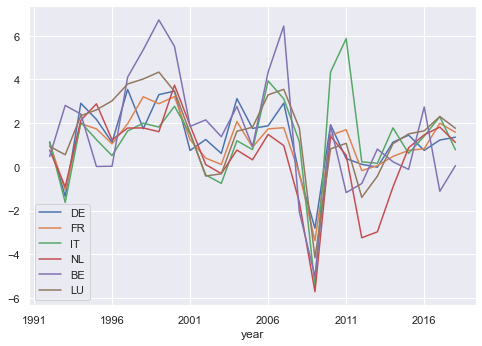

In [36]:
GROWTH.columns = countries
GROWTH.plot();

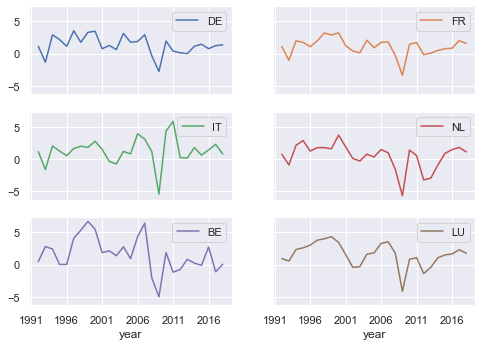

In [37]:
GROWTH.plot(subplots=True, 
        layout=[3,2], sharey=True);

#### Suppose we want to regress change in consumption (as Personal Consumption Expenditures) on the change in gdp:


$$\Delta\ln(c_t)=\alpha+\beta\Delta\ln(y_t)+\epsilon_t$$

In [38]:
import pandas_datareader.data as web
usdata=web.DataReader(['PCEC','GDP'],
                  'fred', 1947, 2019)
usdata.head(8)

,PCEC,GDP
DATE,,
1947-01-01,156.161,243.164
1947-04-01,160.031,245.968
1947-07-01,163.543,249.585
1947-10-01,167.672,259.745
1948-01-01,170.372,265.742
1948-04-01,174.142,272.567
1948-07-01,177.072,279.196
1948-10-01,177.928,280.366


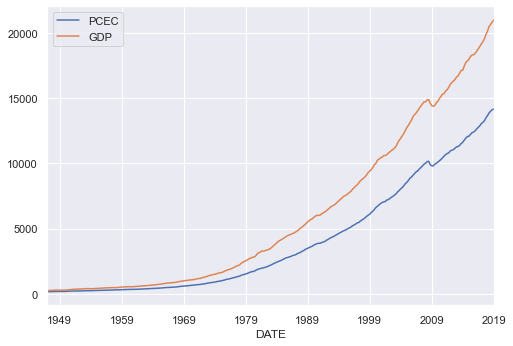

In [40]:
usdata.plot();

In [41]:
import statsmodels.formula.api as smf
smf.ols('PCEC ~ GDP', np.log(usdata).diff()).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PCEC   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     278.2
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           4.28e-44
Time:                        22:47:16   Log-Likelihood:                 1027.1
No. Observations:                 288   AIC:                            -2050.
Df Residuals:                     286   BIC:                            -2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0061      0.001      8.629      0.000       0.005       0.007
GDP            0.6192      0.037     16.679      0.000       0.546       0.692
==============================================================================
Omnibus:                      103.273   Durbin-Watson:                   2.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1109.703
Skew:                          -1.117   Prob(JB):                    1.07e-241
Kurtosis:                      12.354   Cond. No.                         91.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size=4>The sample covers a long period (~$70$y of quarterly observation), thus it is reasonable to wonder whether the parameters are constant.

Let us estimate with a rolling sample. In particular, consider 24 quarterly observations rolling window.</font>


In [42]:
growth=(100*np.log(usdata).diff())[1:] 
T, _ = growth.shape ###---- T = # of observations
h = 24

In [43]:
def window_β(k): return smf.ols('PCEC~GDP',growth[k-h:k]).fit().params['GDP']

/var/folders/mr/_y_c100s5j378qr8ddz_jnch0000gn/T/ipykernel_10474/280566830.py:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  growth.loc[h-1:,'β'] = [window_β(k) for k in range(h,T+1)]


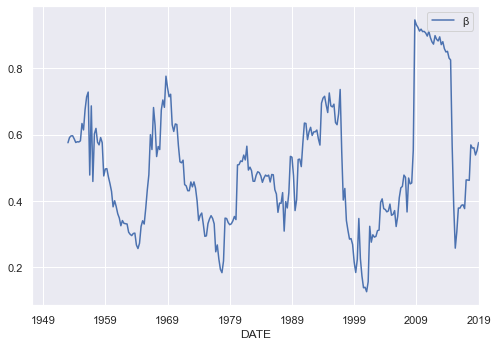

In [44]:
growth.loc[h-1:,'β'] = [window_β(k) for k in range(h,T+1)] 
growth[['β']].plot();

## Another example

In [45]:
# AAPL AMZN and GOOGL stocks
from pandas_datareader import data
tickers = ['AAPL', 'AMZN', 'GOOGL']
start_date, end_date = '2010-01-01', '2019-05-10'
df = data.get_data_yahoo(tickers, start_date, end_date)
df.head()

Attributes Adj Close                         Close                      \
Symbols         AAPL    AMZN       GOOGL      AAPL    AMZN       GOOGL   
Date                                                                     
2010-01-04  6.535084  6.6950  313.688690  7.643214  6.6950  313.688690   
2010-01-05  6.546384  6.7345  312.307312  7.656429  6.7345  312.307312   
2010-01-06  6.442254  6.6125  304.434448  7.534643  6.6125  304.434448   
2010-01-07  6.430344  6.5000  297.347351  7.520714  6.5000  297.347351   
2010-01-08  6.473096  6.6760  301.311310  7.570714  6.6760  301.311310   

Attributes      High                           Low                      \
Symbols         AAPL    AMZN       GOOGL      AAPL    AMZN       GOOGL   
Date                                                                     
2010-01-04  7.660714  6.8305  315.070068  7.585000  6.6570  312.432434   
2010-01-05  7.699643  6.7740  314.234222  7.616071  6.5905  311.081085   
2010-01-06  7.686786  6.7365  313.243256  7.526786  6.5825  303.483490   
2010-01-07  7.571429  6.6160  305.305298  7.466071  6.4400  296.621613   
2010-01-08  7.571429  6.6840  301.926941  7.466429  6.4515  294.849854   

Attributes      Open                           Volume                           
Symbols         AAPL    AMZN       GOOGL         AAPL         AMZN       GOOGL  
Date                                                                            
2010-01-04  7.622500  6.8125  313.788788  493729600.0  151998000.0   3908488.0  
2010-01-05  7.664286  6.6715  313.903900  601904800.0  177038000.0   6003391.0  
2010-01-06  7.656429  6.7300  313.243256  552160000.0  143576000.0   7949443.0  
2010-01-07  7.562500  6.6005  305.005005  477131200.0  220604000.0  12815771.0  
2010-01-08  7.510714  6.5280  296.296295  447610800.0  196610000.0   9439151.0

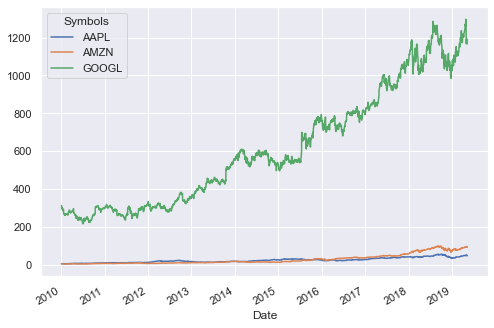

In [46]:
df['Close'].plot();

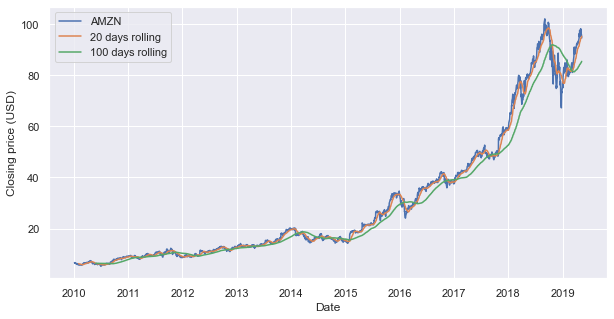

In [47]:
##Plotting
amzn = df['Close']["AMZN"]
# Calculate moving averages of the closing prices rolling at 20 and 100 days 
roll1_amzn = amzn.rolling(window=20).mean()
roll2_amzn = amzn.rolling(window=100).mean()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(amzn, label='AMZN')  
ax.plot(roll1_amzn, label='20 days rolling')
ax.plot(roll2_amzn, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
ax.legend();

### Choropleth Maps

In [48]:
import pycountry
EU_countries = ["Austria","Belgium","Bulgaria","Croatia","Cyprus","Czechia","Denmark",
                "Estonia","Finland","France","Germany","Greece","Hungary","Ireland","Italy","Latvia",
                "Lithuania","Luxembourg","Malta","Netherlands","Poland","Portugal","Romania","Slovakia",
                "Slovenia","Spain","Sweden","United Kingdom"]
print(len(EU_countries) == 28)
countries = [pycountry.countries.get(name= country).alpha_2 for country in EU_countries]

True


In [49]:
from pandas_datareader import wb
wb.search('gdp.*capita.*current').iloc[:,:2] 
###  `.*` indicates that any text in that position is 

,id,name
10223,NE.GDI.FTOT.SNA08.CR,GDP expenditure on gross fixed capital formati...
10520,NY.GDP.PCAP.CD,GDP per capita (current US$)
10521,NY.GDP.PCAP.CN,GDP per capita (current LCU)
10525,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"


In [50]:
GDP = wb.download(indicator='NY.GDP.PCAP.CD',country=countries,start=2017, end=2017)
GDP = GDP.reset_index().drop(columns=['year'])## rearrange data
GDP = GDP.rename(columns = {'NY.GDP.PCAP.CD':'GDP'})
GDP.transpose()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
country,Austria,Belgium,Bulgaria,Cyprus,Czech Republic,Germany,Denmark,Spain,Estonia,Finland,...,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Slovak Republic,Slovenia,Sweden
GDP,47429.158456,44198.482391,8366.293221,26608.875092,20636.199952,44652.589172,57610.09818,28170.167864,20437.765377,46412.136478,...,110193.213797,15695.115154,28250.697775,48675.222335,13864.681758,21490.429863,10807.009167,17538.048584,23514.02546,53791.50873


In [51]:
from datetime import date
import currency_converter as CC  ### Data from ECB
c = CC.CurrencyConverter()
usd_eur = c.convert(1,'EUR', 'USD', date=date(2017,3,21))
GDP['GDP'] /= usd_eur
GDP.transpose()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
country,Austria,Belgium,Bulgaria,Cyprus,Czech Republic,Germany,Denmark,Spain,Estonia,Finland,...,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Slovak Republic,Slovenia,Sweden
GDP,43907.756394,40916.943521,7745.133514,24633.285588,19104.054761,41337.334912,53332.807054,26078.659382,18920.353061,42966.243731,...,102011.86243,14529.823324,26153.210308,45061.305624,12835.291389,19894.861936,10004.637259,16235.927221,21768.214646,49797.730726


In [52]:
cty_α_2 = []
for country in GDP['country']:
    try:
        cty_α_2.append(
            pycountry.countries.get(
                name= country).alpha_3)
    except:
        cty_α_2.append(
            pycountry.countries.get(
                official_name= country).alpha_3)
GDP['country'] = cty_α_2
GDP.transpose()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LUX,LVA,MLT,NLD,POL,PRT,ROU,SVK,SVN,SWE
GDP,43907.756394,40916.943521,7745.133514,24633.285588,19104.054761,41337.334912,53332.807054,26078.659382,18920.353061,42966.243731,...,102011.86243,14529.823324,26153.210308,45061.305624,12835.291389,19894.861936,10004.637259,16235.927221,21768.214646,49797.730726


In [53]:
## Choropleth
import folium
from branca import colormap

map_data = pd.DataFrame({
    'A3': list(GDP['country']),
    'value': list(GDP['GDP']/1000)
})

map_dict = map_data.set_index('A3')['value'].to_dict()
vmin = min(map_dict.values())
vmax = max(map_dict.values())
color_scale = colormap.linear.Blues_09.scale(vmin, vmax )
###### try dir(colormap.linear) for more colormaps
# color_scale = colormap.LinearColormap(['azure','darkblue'], vmin = vmin, vmax = vmax)
# color_scale = colormap.LinearColormap(['yellow','red'], vmin = vmin, vmax = vmax)
color_scale = color_scale.to_step(index=range(0,100,5))# 0,70,10
color_scale.caption = 'GDP per capita [K€]'

def get_color(feature,border = False):
    value = map_dict.get(feature['properties']['A3'])
    if not border:### SET FILLING COLOR
        if value is None:
            return '#DDDDDD' # MISSING -> gray
#             return 'white'  # MISSING -> white
        else:
            return color_scale(value)
    else:         ### SET BORDER COLOR
        if value is None:
            return None # MISSING -> no color
        else:
            return 'black'

m = folium.Map(
    tiles=None, #Stamen Terrain, OpenStreetMap, Stamen Toner, Mapbox Bright, and Mapbox Control Room
    location = [50, 15], 
    zoom_start = 4
)  
folium.GeoJson(
    data = './res/world_geo.json_files/coastline_cty_10km.geo.json',
    style_function = lambda feature: {
        'fillColor': get_color(feature),
        'fillOpacity': 0.7,
        'color' : get_color(feature,border = True),
        'weight' : 1,
    }    
).add_to(m)
m.add_child(color_scale)

In [54]:
m.save('map.html')

# End of Lecture 3